In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [16]:
data = pd.read_csv('../Data/attacks_analys.csv', sep=',', encoding='latin1')

In [66]:
# Me creo un nuevo data con las columnas que me interesan

df = data[["year", "type", "country", "area", "activity", "sex_", "age", "injury", "fatal_y_n"]]


6302

In [69]:
# Checkeo las filas en las que el año o la edad son igual a 0 (valores nulos para mi) y me las elimino

bad_index = df[(df.year==0) | (df.age==0)].index

df.drop(index=bad_index, inplace=True)


3350

In [74]:
# Saco un resumen de los datos numericos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3350.0,1984.584179,31.731507,1703.0,1965.0,1996.0,2009.0,2018.0
age,3350.0,27.362090,13.897545,1.0,17.0,24.0,35.0,87.0


In [99]:
# Hago una agrupación para ver diferente medidas en función del pais

df.groupby("country").agg({"age": ["count", "mean", "median", "std"]}).sort_values(("age","count"), ascending=False).head(10)

age                             
                 count       mean median        std
country                                            
USA               1462  26.753078   22.0  14.595243
AUSTRALIA          697  27.916786   24.0  13.598997
SOUTH AFRICA       362  25.616022   23.0  10.794174
BAHAMAS             67  36.626866   36.0  14.744116
BRAZIL              64  24.015625   21.0  10.071951
NEW ZEALAND         48  27.604167   23.5  15.479210
PAPUA NEW GUINEA    44  20.727273   19.0   9.081962
MEXICO              41  31.780488   32.0  11.816328
REUNION             35  29.200000   27.0  11.192960
FIJI                29  28.655172   28.0  12.175138

In [100]:
# Hago una pivot table para ver diferente medidas en función del pais y del sexo

df.pivot_table(aggfunc=['count', 'mean'], index=['country'], columns=['sex_'], values=['age'], margins=True ).sort_values(("count", "age", "All"), ascending=False).head(10)

count                             mean             \
                    age                              age              
sex_             Female    Male unknown   All     Female       Male   
country                                                               
All               441.0  2876.0    33.0  3350  26.900227  27.473922   
USA               268.0  1183.0    11.0  1462  26.100746  26.967878   
AUSTRALIA          58.0   632.0     7.0   697  27.603448  27.988924   
SOUTH AFRICA       14.0   348.0     NaN   362  23.357143  25.706897   
BAHAMAS            11.0    56.0     NaN    67  30.818182  37.767857   
BRAZIL              4.0    60.0     NaN    64  25.000000  23.950000   
NEW ZEALAND         6.0    41.0     1.0    48  22.166667  28.731707   
PAPUA NEW GUINEA    4.0    37.0     3.0    44  16.000000  21.837838   
MEXICO              5.0    35.0     1.0    41  29.000000  31.457143   
REUNION             2.0    33.0     NaN    35  18.500000  29.848485   

                                        
                                        
sex_                unknown        All  
country                                 
All               23.787879  27.362090  
USA               19.545455  26.753078  
AUSTRALIA         24.000000  27.916786  
SOUTH AFRICA            NaN  25.616022  
BAHAMAS                 NaN  36.626866  
BRAZIL                  NaN  24.015625  
NEW ZEALAND       14.000000  27.604167  
PAPUA NEW GUINEA  13.333333  20.727273  
MEXICO            57.000000  31.780488  
REUNION                 NaN  29.200000

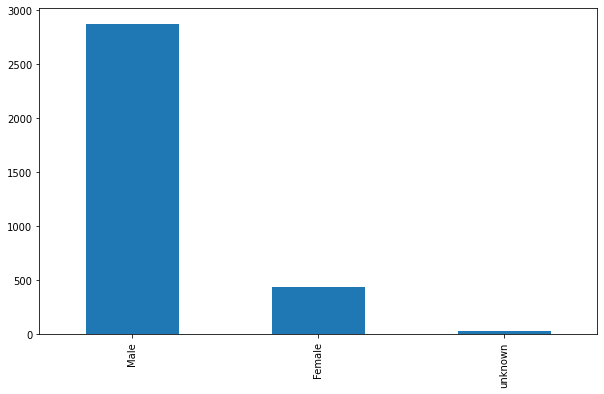

In [73]:
plt.figure(figsize=(10, 6))
df.sex_.value_counts().plot.bar();

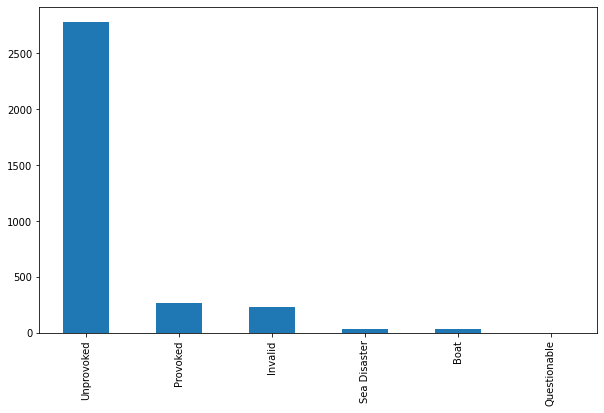

In [70]:
plt.figure(figsize=(10, 6))
df.type.value_counts().plot.bar();